# [ Oasis Infobyte-Data Science Internship ]

 **NAME:-YASH DAHAKE**

## TASK-3 SALES PREDICTION USING PYTHON [ JAN-2023]¶

### Importing Required Libraries

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


### Loading The Dataset

In [2]:
#Loading the dataset
data=pd.read_csv("Advertising.csv")

### Exploratory Data Analysis

In [3]:
data.head(5)#looking first five rows

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


### Checking Column Headings

In [4]:
print("Column Headings : \n\n",data.columns)

Column Headings : 

 Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')


### Dropping Column

In [5]:
data=data.drop('Unnamed: 0',axis=1)

### Checking Datatypes In Dataset

In [6]:
data.info() # Lets check dtype and missing valus by using info command

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


### Checking Number of Rows And Columns 

In [7]:
print("Number of Rows and Columns",data.shape)

Number of Rows and Columns (200, 4)


### Counting Value Of Each Column

In [8]:
data.count()

TV           200
Radio        200
Newspaper    200
Sales        200
dtype: int64

### Checking Of Missing Values

In [9]:

data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

### Summarizing Data

In [10]:
data.describe()


,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


### Data and Information With Visualization

Performing univariate analyasis


<AxesSubplot:xlabel='Newspaper', ylabel='Density'>

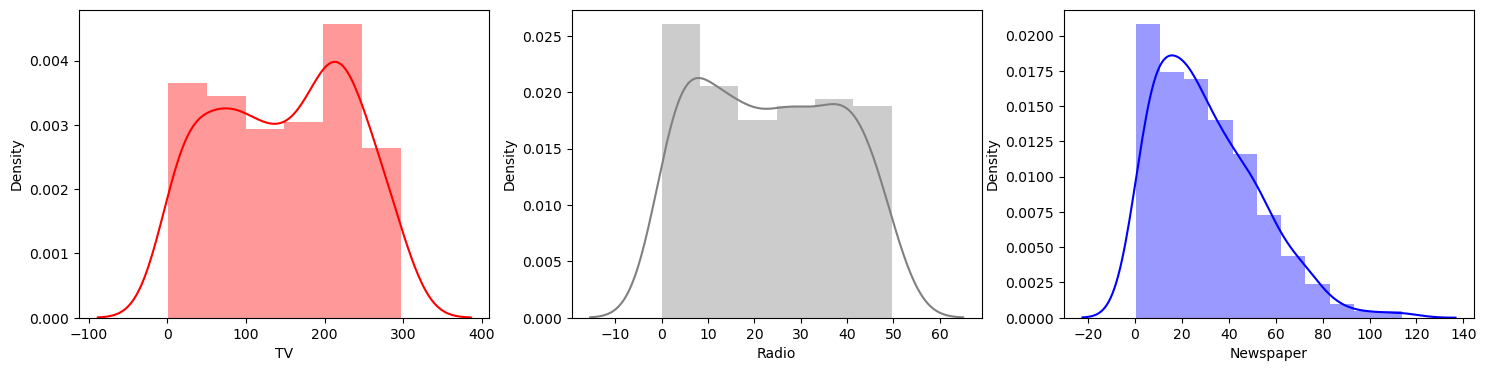

In [11]:
#analyzing each variable seprately

plt.rcParams['figure.figsize']=(18,4)

plt.subplot(1,3,1)
sns.distplot(data['TV'],color='red')# FOR TV

plt.subplot(1,3,2)
sns.distplot(data['Radio'],color='grey') # FOR RADIO

plt.subplot(1,3,3)
sns.distplot(data['Newspaper'],color='blue') # FOR NEWSPAPER

<AxesSubplot:xlabel='Sales', ylabel='Density'>

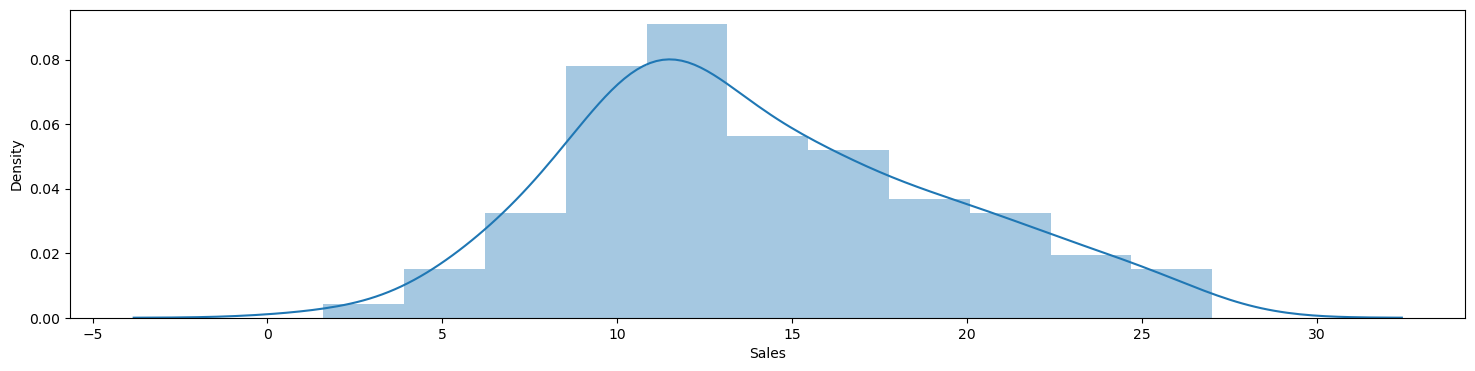

In [12]:
sns.distplot(data['Sales']) # FOR SALES

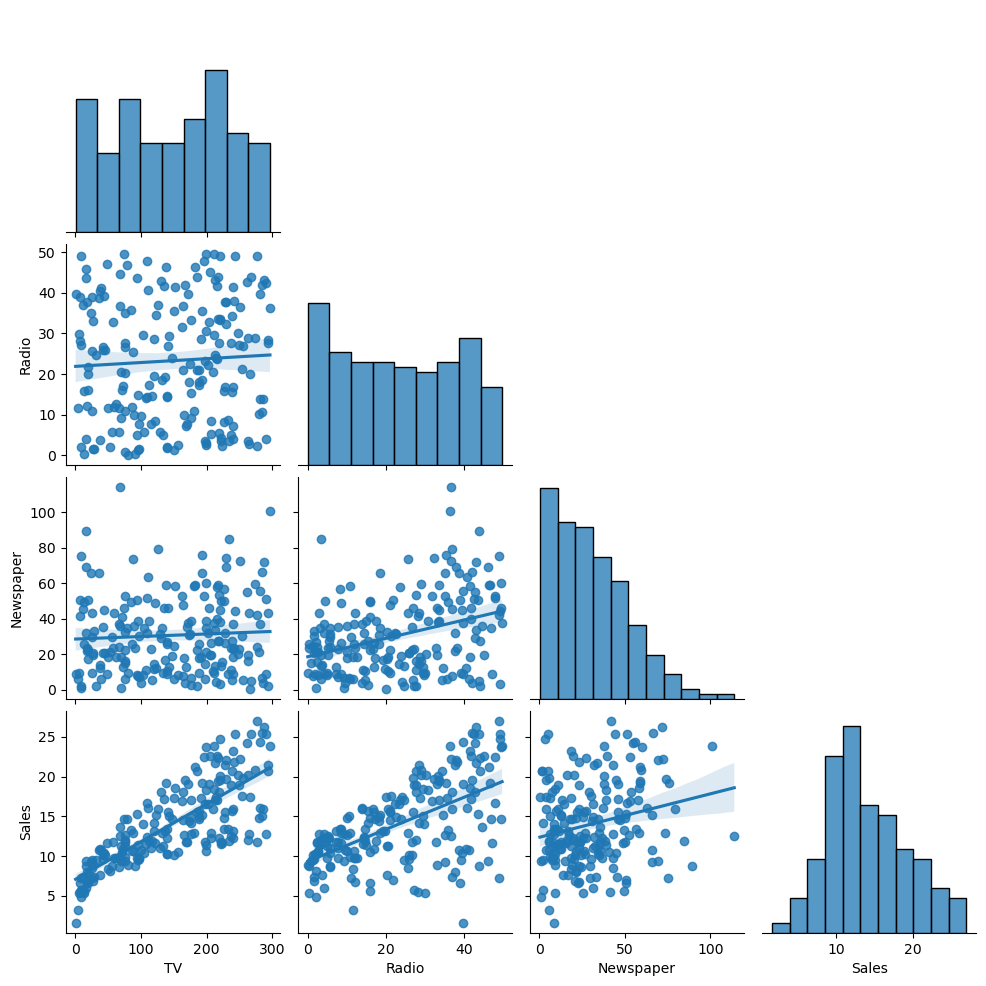

In [13]:
sns.pairplot(data, kind="reg",corner=True )

### Observations:-

**Sales having highly collerated with "TV" advertisement.**

**Sale having moderate correlation with "Radio" advertisement.**
  
**Sales having low correlation with  "Newspaper" advertisement**

array([[<AxesSubplot:title={'center':'TV'}>,
        <AxesSubplot:title={'center':'Radio'}>],
       [<AxesSubplot:title={'center':'Newspaper'}>,
        <AxesSubplot:title={'center':'Sales'}>]], dtype=object)

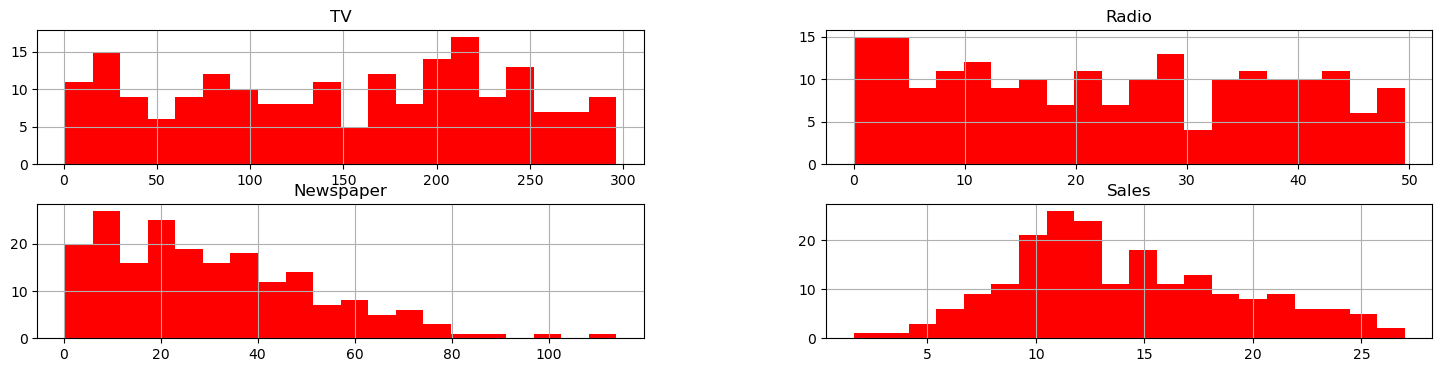

In [14]:
data.hist(bins=20,color="red")

### Data Correlation Analysis

In [15]:
data.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


### Performing Multivariate Analyasis

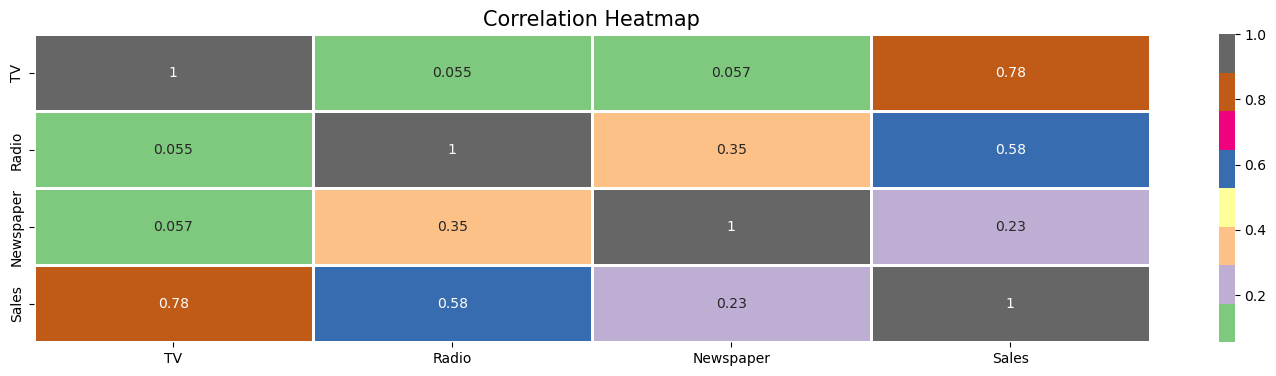

In [16]:
sns.heatmap(data.corr(),annot=True,linewidth=1,cmap='Accent')# HEATMAP
plt.title('Correlation Heatmap',fontsize=15)
plt.show()

### Visualizing The Outlier

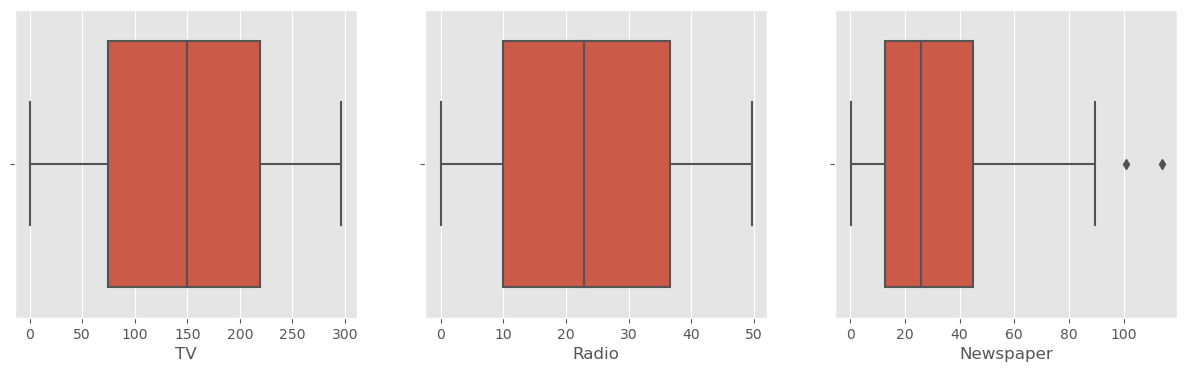

In [17]:

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
plt.rcParams['figure.figsize']=(15,4)

plt.subplot(1,3,1)
sns.boxplot(data['TV'])

plt.subplot(1,3,2)
sns.boxplot(data['Radio'])

plt.subplot(1,3,3)
sns.boxplot(data['Newspaper'])

plt.show()


### As it is seen that Newspaper column has some outlier

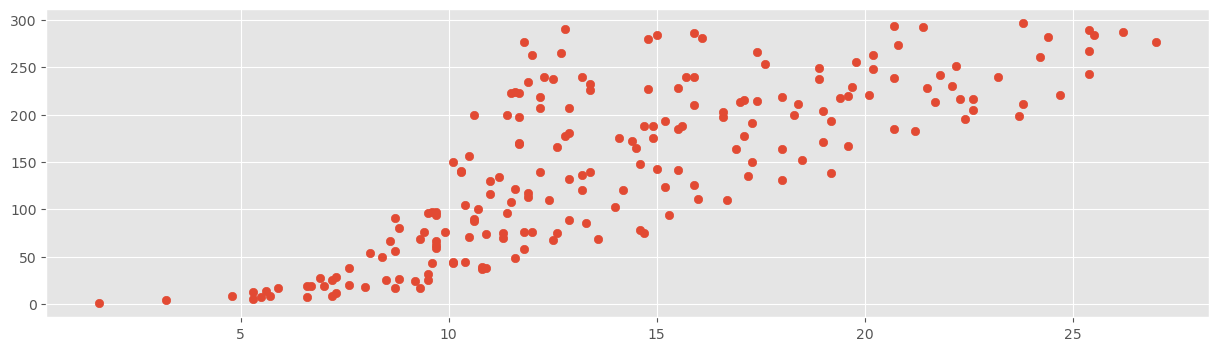

In [18]:
## TV seem to be correlated with dependent variable
plt.scatter(data['Sales'],data['TV'])


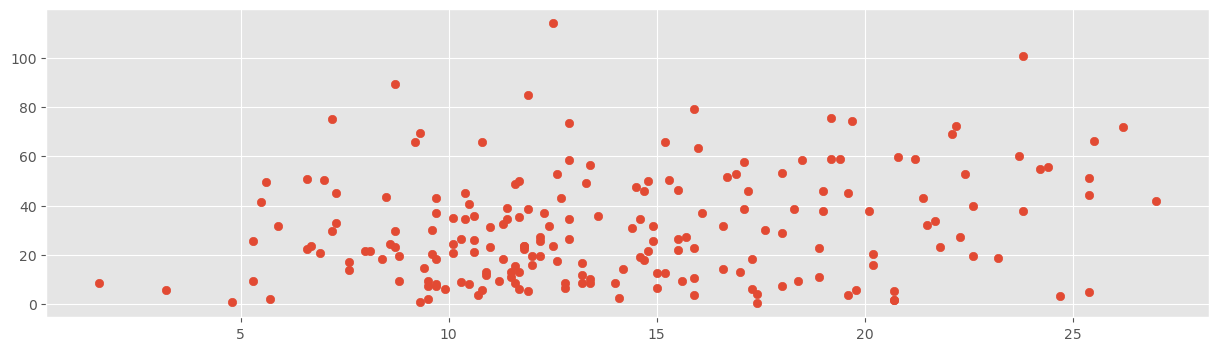

In [19]:
## Newspaper does not seem to be correlated with dependent variable
plt.scatter(data['Sales'],data['Newspaper'])

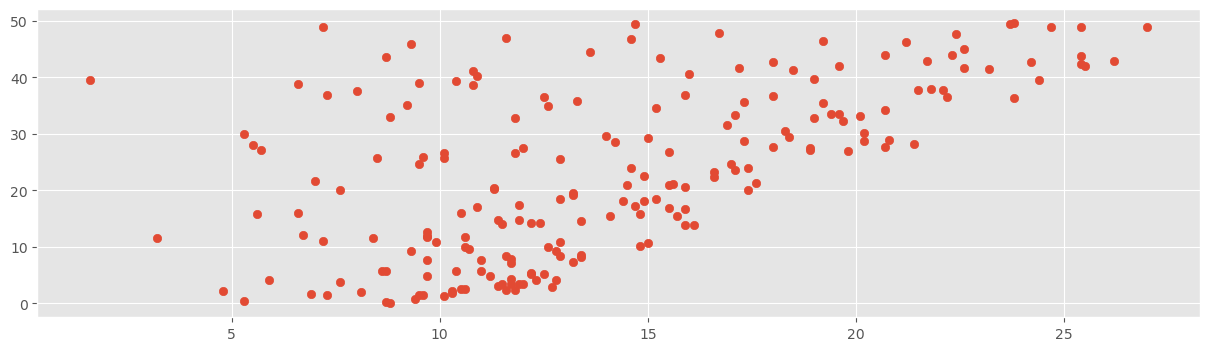

In [20]:
## Radio seem to be  moderately correlated with dependent variable
plt.scatter(data['Sales'],data['Radio'])

### Spliting The dataset

In [21]:
x=data.iloc[:,0:-1]
x

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [22]:
y=data.iloc[:,-1]
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64

## Train Test Split
**Train-80% and Test-20%**

In [23]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=5)

In [24]:
x_train 

,TV,Radio,Newspaper
159,131.7,18.4,34.6
62,239.3,15.5,27.3
166,17.9,37.6,21.6
45,175.1,22.5,31.5
23,228.3,16.9,26.2
...,...,...,...
73,129.4,5.7,31.3
144,96.2,14.8,38.9
118,125.7,36.9,79.2
189,18.7,12.1,23.4


In [25]:
x_test

,TV,Radio,Newspaper
119,19.4,16.0,22.3
77,120.5,28.5,14.2
148,38.0,40.3,11.9
149,44.7,25.8,20.6
154,187.8,21.1,9.5
151,121.0,8.4,48.7
122,224.0,2.4,15.6
6,57.5,32.8,23.5
28,248.8,27.1,22.9
71,109.8,14.3,31.7


In [26]:
y_train


159    12.9
62     15.7
166     8.0
45     14.9
23     15.5
       ... 
73     11.0
144    11.4
118    15.9
189     6.7
99     17.2
Name: Sales, Length: 160, dtype: float64

In [27]:
y_test

119     6.6
77     14.2
148    10.9
149    10.1
154    15.6
151    11.6
122    11.6
6      11.8
28     18.9
71     12.4
188    15.9
34      9.5
21     12.5
40     16.6
55     23.7
104    20.7
3      18.5
39     21.5
117     9.4
134    10.8
180    10.5
26     15.0
54     20.2
165    11.9
53     21.2
93     22.2
174    11.5
17     24.4
56      5.5
84     21.7
25     12.0
156    15.3
42     20.7
141    19.2
50     11.4
51     10.7
195     7.6
116    12.2
142    20.1
24      9.7
Name: Sales, dtype: float64

In [28]:
x_train=x_train.astype(int)# making them integer type from float
y_train=y_train.astype(int)# making them integer type from float
x_test=x_test.astype(int)# making them integer type from float
y_test=y_test.astype(int)# making them integer type from float

In [29]:
from sklearn.preprocessing import StandardScaler
Sc=StandardScaler()
x_train_scaled=Sc.fit_transform(x_train)

In [30]:
x_test_scaled=Sc.fit_transform(x_test)


### Applying LinearRegession

In [31]:
from sklearn.linear_model import LinearRegression

### Model Building 

In [32]:
lr=LinearRegression()

In [33]:
lr.fit(x_train_scaled,y_train)

LinearRegression()

In [34]:
y_pred=lr.predict(x_test_scaled)

In [35]:
from sklearn.metrics import r2_score

In [36]:
r2_score(y_test,y_pred)

0.864037359850653

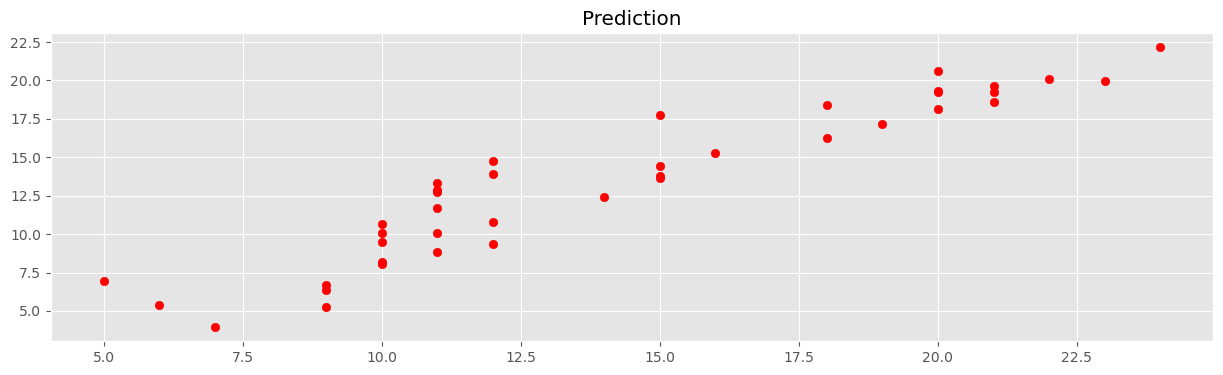

In [37]:
plt.scatter(y_test,y_pred,c="red")

plt.title("Prediction")

plt.show()

### Conclusion :->¶

**A linear regression model was developed to find realtions among data and prediction based on the previous data with an accuracy around 85 %. The model was trained using a "Advertising dataset" and the results show the effectiveness of using linear regression for this specific problem.**